In [2]:
from __future__ import division
import numpy as np

numPts = 20
controlPts = [[0, 0], [0.5, 1], [1, 0]]
t = np.array([i * 1 / numPts for i in range(0, numPts+1)])

B_x = (1-t)**2 * controlPts[0][0] + 2*(1-t)*t * controlPts[1][0] + t**2 * controlPts[2][0]
B_y = (1-t)**2 * controlPts[0][1] + 2*(1-t)*t * controlPts[1][1] + t**2 * controlPts[2][1]

In [3]:
import matplotlib.pyplot as plt

#unzip the list
xPts, yPts = zip(*controlPts)
plt.plot(B_x, B_y, 'b', label='Bezier Curve')
plt.plot(xPts, yPts, color='#666666',)
plt.plot(xPts, yPts, 'o', mfc='none', mec='r',markersize=8, label='control points')
plt.title('Quadratic Bezier Curve')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.legend(loc=1, fontsize=12)
#plt.savefig('01-basic-quadratic-bezier-curve.png',dpi=100)
plt.show()

In [13]:
#------------------------------------------------------------------------------+
#
#   Nathan A. Rooy
#   Composite Quadratic Bezier Curve Example (Airfoil)
#   2015-08-12
#
#------------------------------------------------------------------------------+

#--- IMPORT DEPENDENCIES ------------------------------------------------------+

from __future__ import division
import numpy as np

#--- MAIN ---------------------------------------------------------------------+

def quadraticBezier(t,points):
    B_x=(1-t)*((1-t)*points[0][0]+t*points[1][0])+t*((1-t)*points[1][0]+t*points[2][0])
    B_y=(1-t)*((1-t)*points[0][1]+t*points[1][1])+t*((1-t)*points[1][1]+t*points[2][1])
    return B_x,B_y

def airfoil(ctlPts,numPts,write):
    curve=[]
    t=np.array([i*1/numPts for i in range(0,numPts)])
    
    # calculate first Bezier curve
    midX=(ctlPts[1][0]+ctlPts[2][0])/2
    midY=(ctlPts[1][1]+ctlPts[2][1])/2
    B_x0,B_y0=quadraticBezier(t,[ctlPts[0],ctlPts[1],[midX,midY]])
    curve=curve+list(zip(B_x0,B_y0))

    # calculate middle Bezier Curves
    for i in range(1,len(ctlPts)-3):
        p0=ctlPts[i]
        p1=ctlPts[i+1]
        p2=ctlPts[i+2]
        midX_1=(ctlPts[i][0]+ctlPts[i+1][0])/2
        midY_1=(ctlPts[i][1]+ctlPts[i+1][1])/2
        midX_2=(ctlPts[i+1][0]+ctlPts[i+2][0])/2
        midY_2=(ctlPts[i+1][1]+ctlPts[i+2][1])/2

        B_xi,B_yi=quadraticBezier(t,[[midX_1,midY_1],ctlPts[i+1],[midX_2,midY_2]])
        curve=curve+list(zip(B_xi,B_yi))                      
   
    # calculate last Bezier curve
    midX=(ctlPts[-3][0]+ctlPts[-2][0])/2
    midY=(ctlPts[-3][1]+ctlPts[-2][1])/2

    B_x1,B_y1=quadraticBezier(t,[[midX,midY],ctlPts[-2],ctlPts[-1]])
    curve=curve+list(zip(B_x1,B_y1))
    curve.append(ctlPts[-1])

    # write airfoil coordinates to text file
    if write:
        xPts,yPts=zip(*curve)
        f=open('testa.txt','w+')
        for i in range(len(xPts)):
            f.write(str(xPts[i])+','+str(yPts[i])+'\n')
        f.close()

    return curve

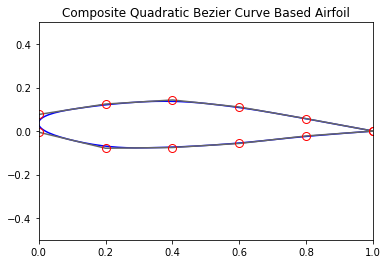

In [14]:
#--- 11 CONTROL POINT AIRFOIL EXAMPLE -----------------------------------------+

points=[[1.0, 0.0],
   [0.8, 0.056956894281157334],
   [0.6, 0.11066551163796522],
   [0.4, 0.14311139501474762],
   [0.2, 0.12432931385249717],
   [0.0, 0.0762655965033925],
   [0.0, -0.0049564958361374275],
   [0.2, -0.078882650592958889],
   [0.4, -0.075636961295827809],
   [0.6, -0.056721061202896154],
   [0.8, -0.022294270607940338],
   [1.0, 0.0]]

#--- RUN EXAMPLE --------------------------------------------------------------+

curve=airfoil(points,16,write=True) # pick even number of points so that the leading edge is defined by a single point...

#--- PLOT ---------------------------------------------------------------------+

from pylab import *
import matplotlib.pyplot as plt

xPts,yPts=zip(*points)
xPts2,yPts2=zip(*curve)
plot(xPts2,yPts2,'b')
plot(xPts,yPts,color='#666666')
plot(xPts,yPts,'o',mfc='none',mec='r',markersize=8)
plt.title('Composite Quadratic Bezier Curve Based Airfoil')
plt.xlim(0.0, 1.0)
plt.ylim(-0.5, 0.5)
##plt.savefig('airfoil-final.png',dpi=72)
plt.show()

#--- END ----------------------------------------------------------------------+

In [10]:
def frange(start, finish, interval=1.0):
    #frange starts from small angle to large angle
    assert finish > start, 'frange start with smaller number'
    x = float(start)
    out = [x]
    while x < float(finish):
        x+=interval
        out.append(round(x, 5))
    #make sure that the last element is the finish value
    out = list(set(out[:-1] + [float(finish)]))
    #list element is from small to large
    return sorted(out)

#setup the original control points using interpolation
upperX = lowerX = frange(0, 1, 1/5)
#get the airfoil coordiante
origin = file2cor('backup/FX84-218.txt')
zero = origin.index([0.0,0.0])
genesUp = (origin[:zero])[::-1]
genesDown = (origin[zero+1:])
    
upX = [i[0] for i in genesUp]
upY = [i[1] for i in genesUp]
tck = interpolate.splrep(upX, upY, s=0)
upperY = interpolate.splev(upperX, tck, der=0)
upper = list(zip(upperX, upperY))
upper = [list(i) for i in upper]

downX = [i[0] for i in genesDown]
downY = [i[1] for i in genesDown]
tck = interpolate.splrep(downX, downY, s=0)
lowerY = interpolate.splev(lowerX, tck, der=0)
lower = list(zip(lowerX, lowerY))
lower = [list(i) for i in lower]
    
#initial contral points
ctlPts = [upper[::-1], lower]
    
    

NameError: name 'file2cor' is not defined

In [9]:
ctlPts

NameError: name 'ctlPts' is not defined

In [2]:
Bezier.airfoil(points, 20, 'testtest.txt')

NameError: name 'Bezier' is not defined

In [28]:


def execute(airfoil_loc, airfoil, data_loc, angles, rey_range):
    #create a directory for each airfoil
    filedir = data_loc+airfoil
    if not os.path.isdir(filedir):
        os.makedirs(filedir)
    for RE in rey_range:
        #coupling xfoil into python
        if not isfile(filedir+'/'+str(RE)+'.txt'):
            ps = sp.Popen(['xfoil.exe'],
                          stdin=sp.PIPE,
                          stdout=None,
                          stderr=None,
                          encoding='utf8')
            #execute the script
            res = ps.communicate('\n'.join(script(airfoil_loc,airfoil, filedir, angle_range, RE)))

def script(airfoil_loc, airfoil, data_loc, AOT, RE):
    load_script = ['load '+airfoil_loc+airfoil+".txt", 
            airfoil,
            'MDES',
            'FILT',
            'EXEC',
            ' ',
            'PANE',
            'OPER',
            'ITER 150']       
    #define the output file name (different reynolds number has different file)
    data_file_name = data_loc+'/'+str(RE)+'.txt'
    #check and create file
    constant_set = ['RE ' + str(RE),
                    'VISC ' +str(RE),
                    'PACC', 
                    data_loc,
                    ' ']
    #analyse different angle of attack
    alpha = ['ALFA '+str(a) for a in AOT]
    init = constant_set + alpha + ['PACC', ' ',]
    load_script += init
    load_script += [' ', ' ', 'QUIT\n']
    return load_script

def frange(start, finish, interval=1.0):
    #frange starts from small angle to large angle
    assert finish > start, 'frange start with smaller number'
    x = float(start)
    out = [x]
    while x < float(finish):
        x+=interval
        out.append(round(x, 5))
    return out

In [35]:
scri = script('backup/', 'S813', 'teste.txt', frange(-10, 10, 0.1), 300000)
scri

['load backup/S813.txt',
 'S813',
 'MDES',
 'FILT',
 'EXEC',
 ' ',
 'PANE',
 'OPER',
 'ITER 150',
 'RE 300000',
 'VISC 300000',
 'PACC',
 'teste.txt',
 ' ',
 'ALFA -10.0',
 'ALFA -9.9',
 'ALFA -9.8',
 'ALFA -9.7',
 'ALFA -9.6',
 'ALFA -9.5',
 'ALFA -9.4',
 'ALFA -9.3',
 'ALFA -9.2',
 'ALFA -9.1',
 'ALFA -9.0',
 'ALFA -8.9',
 'ALFA -8.8',
 'ALFA -8.7',
 'ALFA -8.6',
 'ALFA -8.5',
 'ALFA -8.4',
 'ALFA -8.3',
 'ALFA -8.2',
 'ALFA -8.1',
 'ALFA -8.0',
 'ALFA -7.9',
 'ALFA -7.8',
 'ALFA -7.7',
 'ALFA -7.6',
 'ALFA -7.5',
 'ALFA -7.4',
 'ALFA -7.3',
 'ALFA -7.2',
 'ALFA -7.1',
 'ALFA -7.0',
 'ALFA -6.9',
 'ALFA -6.8',
 'ALFA -6.7',
 'ALFA -6.6',
 'ALFA -6.5',
 'ALFA -6.4',
 'ALFA -6.3',
 'ALFA -6.2',
 'ALFA -6.1',
 'ALFA -6.0',
 'ALFA -5.9',
 'ALFA -5.8',
 'ALFA -5.7',
 'ALFA -5.6',
 'ALFA -5.5',
 'ALFA -5.4',
 'ALFA -5.3',
 'ALFA -5.2',
 'ALFA -5.1',
 'ALFA -5.0',
 'ALFA -4.9',
 'ALFA -4.8',
 'ALFA -4.7',
 'ALFA -4.6',
 'ALFA -4.5',
 'ALFA -4.4',
 'ALFA -4.3',
 'ALFA -4.2',
 'ALFA -4.1',
 '

In [34]:
import psutil as ps
from subprocess import PIPE
import time
pro = ps.Popen(['xfoil.exe'],
                stdin=PIPE,
                stdout=None,
                stderr=None,
                encoding='utf8')
#execute the script
res = pro.communicate('\n'.join(scri))


NoSuchProcess: psutil.NoSuchProcess process no longer exists (pid=20548)